- - -
# 2. Visualization

## 0) 함수정의

- plot_grid_map 함수: QGIS를 활용하여 만든 500X500격자와 주어진 데이터를 id(그리드)별로 통합하여 FisherJenks 이론을 바탕으로 세종특별자치시 지도 위에 단계(k)별로 그리는 함수


In [34]:
import mapclassify as mc
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.colors import ListedColormap
import matplotlib
%config InlineBackend.figure_format='retina' #화질 좋게 해주기

import matplotlib.font_manager as fm
nanumr = fm.FontProperties(fname='NanumSquareOTFRegular.otf', size=18)
nanumb = fm.FontProperties(fname='NanumSquareOTFBold.otf', size=18)

In [35]:
def plot_grid_map(df, col, k = 6, title = 'No name', mode = None, cls_dict = None, how = None,
                  annotation = False, percen = True, colors = 'Blues', c_mode = 'NaturalBreaks'):
    
    # 주어진 데이터를 적절히 단계별로 나누는 코드
    if mode == 'cont_classify':
        dfdf = df[df[col]>0]
        if c_mode == 'NaturalBreaks':
            quantiles = mc.NaturalBreaks(dfdf[col].dropna(), k = k)
        elif c_mode == 'FisherJenks':
            quantiles = mc.FisherJenks(dfdf[col].dropna(), k = k)
        df['cls_value'] = quantiles.find_bin(df[col]).astype('str')
        df.loc[df[col].isnull(), 'cls_value'] = 'No Data'
        df.loc[df[col]<0, 'cls_value'] = 'Minus'
        cmap = plt.cm.get_cmap(colors, k)
        cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
        if len(np.where(df['cls_value'].unique() == 'Minus')[0]) != 0:
            cmap_list.append('#F78181')
        if len(np.where(df['cls_value'].unique() == 'No Data')[0]) != 0:
            cmap_list.append('#bdbdbd')
        cmap_with_grey = ListedColormap(cmap_list)
    if mode == 'cluster':
        k = len(df[col].unique())
        df[col].fillna(-2, inplace=True)
        df[col].astype('int')
        df['cls_value'] = df[col] + 1
        df.sort_values('cls_value')
        df.loc[df[col]<0, 'cls_value'] = 'No Data'
        cmap = plt.cm.get_cmap(colors, k)
        cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
        if len(np.where(df['cls_value'].unique() == 'No Data')[0]) != 0:
            cmap_list.append('#bdbdbd')
        cmap_with_grey = ListedColormap(cmap_list)
    
        
    # plot 그리는 코드
    fig, ax = plt.subplots(figsize=(12, 10))
    df.plot(column='cls_value', edgecolor='k', cmap=cmap_with_grey,linewidth=0.05,
             legend=True, legend_kwds=dict(loc='upper right'),ax=ax)
    
    # 범례이름 바꾸는 코드
    if mode == 'cont_classify':
        legend_labels = ax.get_legend().get_texts()
        upper_bounds = quantiles.bins
        bounds = []
        for index, upper_bound in enumerate(upper_bounds):
            if index == 0:
                lower_bound = float(df.cls_value.min())
            else:
                lower_bound = float(upper_bounds[index-1])
            
            if percen:
                bound = '{}% - {}%'.format(round(lower_bound, 1), round(upper_bound, 1))
            else:
                bound = '{} - {}'.format(round(lower_bound, 2), round(upper_bound, 2))
            bounds.append(bound)
    if mode == 'cluster':
        if 'No Data' in list(df['cls_value'].unique()):
            legend_labels = ax.get_legend().get_texts()
            bounds = []
            for num in list(price_merge['cls_value'].unique())[0:-1]:
                bound = 'cluster {}'.format(round(num))
                bounds.append(bound)     
        else:
            legend_labels = ax.get_legend().get_texts()
            bounds = []
            for num in list(price_merge['cls_value'].unique()):
                bound = 'cluster {}'.format(num)
                bounds.append(bound)  
        
    # replace the numerical legend labels
    for bound, legend_label in zip(bounds, legend_labels):
        legend_label.set_text(bound)
        
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'} , fontproperties=nanumr)
    fig.show()

- 색깔 팔레트: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## 1) 시기별 이슈 확인

### 시계열로 거래 데이터 시각화

In [36]:
# datetime 형태로 바꿔줍니다

df3, df4, df5, df6  = data3, data4, data5, data6
df7, df8, df9, df10  = data7, data8, data9, data10

df3['계약년월'] = pd.to_datetime(df3['계약년월'], format='%Y%m')
df4['계약년월'] = pd.to_datetime(df4['계약년월'], format='%Y%m')
df5['계약년월'] = pd.to_datetime(df5['계약년월'], format='%Y%m')
df6['계약년월'] = pd.to_datetime(df6['계약년월'], format='%Y%m')
df7['계약년월'] = pd.to_datetime(df7['계약년월'], format='%Y%m')
df8['계약년월'] = pd.to_datetime(df8['계약년월'], format='%Y%m')
df9['계약년월'] = pd.to_datetime(df9['계약년월'], format='%Y%m')
df10['계약년월'] = pd.to_datetime(df10['계약년월'], format='%Y%m')

In [37]:
# 전월세 데이터를 전세와 월세로 구분합니다
# 1이 전세, 2가 월세

df71 = df7[df7['전월세구분'] == '전세']
df72 = df7[df7['전월세구분'] == '월세']
df81 = df8[df8['전월세구분'] == '전세']
df82 = df8[df8['전월세구분'] == '월세']
df91 = df9[df9['전월세구분'] == '전세']
df92 = df9[df9['전월세구분'] == '월세']
df101 = df7[df7['전월세구분'] == '전세']
df102 = df7[df7['전월세구분'] == '월세']

In [38]:
# 월별로 계약 건수를 세주는 함수를 만듭니다

def counting(df):
    df = df.set_index('계약년월')
    df = df.groupby([pd.Grouper(freq='1M')]).count()
    return df

In [39]:
# 하나의 데이터프레임으로 합쳐줍니다

df = DataFrame()
df['apt_m'] = counting(df3)['계약일']
df['vil_m'] = counting(df4)['계약일']
df['house_m'] = counting(df5)['계약일']
df['op_m'] = counting(df6)['계약일']
df['apt_j'] = counting(df71)['계약일']
df['vil_j'] = counting(df81)['계약일']
df['house_j'] = counting(df91)['계약일']
df['op_j'] = counting(df101)['계약일']
df['apt_w'] = counting(df72)['계약일']
df['vil_w'] = counting(df82)['계약일']
df['house_w'] = counting(df92)['계약일']
df['op_w'] = counting(df102)['계약일']

df = df.reset_index()

In [40]:
df['apt'] = df['apt_m'] + df['apt_j'] + df['apt_w']
df['vil'] = df['vil_m'] + df['vil_j'] + df['vil_w']
df['house'] = df['house_m'] + df['house_j'] + df['house_w']
df['op'] = df['op_m'] + df['op_j'] + df['op_w']
df['buy'] = df['apt_m'] + df['vil_m'] + df['house_m'] + df['op_m']
df['jun'] = df['apt_j'] + df['vil_j'] + df['house_j'] + df['op_j']
df['wol'] = df['apt_w'] + df['vil_w'] + df['house_w'] + df['op_w']
df['all'] = df['apt'] + df['vil'] + df['house'] + df['op']
deal = df

### 세종시 실거래량 추이

In [41]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['all'], line = dict(color='#0B0B61', width=3)))
fig.update_layout(title='세종시 실거래량 추이', plot_bgcolor='#F8F7F1')
fig.show()

### 세종시 거주형태별 실거래량 추이

In [42]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['apt'], line = dict(color='#0B0B61', width=3), name='아파트'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['vil'], line = dict(color='#404040', width=3), name='연립다세대'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['house'], line = dict(color='#F3C706', width=3), name='단독다가구'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['op'], line = dict(color='#0B6121', width=3), name='오피스텔'))
fig.update_layout(title='세종시 거주형태별 거래량 추이', plot_bgcolor='#F8F7F1')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()


### 세종시 거래형태별 실거래량 추이

In [43]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['buy'], line = dict(color='#0B0B61', width=3), name='매매'))
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['jun'], line = dict(color='#0B6121', width=3), name='전세'))
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['wol'], line = dict(color='#F3C706', width=3), name='월세'))
fig.update_layout(title='세종시 거래형태별 거래량 추이', plot_bgcolor='#F8F7F1')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

네이버 뉴스 크롤링 자료 활용 (2017년 1월 ~ 2020년 12월까지, '세종시 부동산' 이라는 키워드로 뉴스 기사 크롤링

In [44]:
df2017 = pd.read_csv('sejong2017.csv', encoding= 'utf-8')
df2018 = pd.read_csv('sejong2018.csv', encoding= 'utf-8')
df2019 = pd.read_csv('sejong2019.csv', encoding= 'utf-8')
df2020 = pd.read_csv('sejong2020.csv', encoding= 'utf-8')

In [45]:
# Data concat
df = pd.concat([df2017,df2018,df2019,df2020])

In [46]:
# 데이터 길이 확인
print('2017년: ',len(df2017))
print('2018년: ',len(df2018))
print('2019년: ',len(df2019))
print('2020년: ',len(df2020))

2017년:  9081
2018년:  7653
2019년:  6794
2020년:  19766


### Tokenizing package

In [47]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

### 데이터 전처리

In [48]:
# 불용어 설정
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수','세종시','세종','부동산']

In [49]:
# 훈련 데이터 한글과 공백을 제외하고 모두 제거
df['title'] = df['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['title'].replace('', np.nan, inplace=True)

### 뉴스 개수 변화 추이

In [50]:
df['years'] = pd.to_datetime(df['years'], format='%Y.%m.%d.')

In [51]:
def counting(df):
    df = df.set_index('years')
    df = df.groupby([pd.Grouper(freq='1M')]).count()
    return df

In [52]:
df2 = counting(df)

In [53]:
df2 = df2.drop(['contents','link','Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis = 1)

In [54]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df2.index,y=df2['title'], line = dict(color='#0B0B61', width=3)))
fig.update_layout(title='연월별 뉴스 보도 개수 추이', plot_bgcolor='#F8F7F1')
fig.show()

### 기사 제목 토큰화

In [55]:
okt = Okt()
token = []
for sentence in df['title']:
    temp_X = []
    temp_X = okt.nouns(sentence) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
df['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

### 기준에 따른 분류 - 12개 구간으로 설정

In [56]:
df = df.sort_values('years')

import datetime
df_1 = df[df['years'] <'2017-04-01'] # 3 / 1,2,3
df_2 = df[(df['years']>= '2017-04-01')&(df['years'] <'2017-07-01')] # 3 / 4,5,6
df_3 = df[(df['years']>= '2017-07-01')&(df['years'] <'2017-11-01')] # 4 / 7,8,9,10
df_4 = df[(df['years']>= '2017-11-01')&(df['years'] <'2018-01-01')] # 2 / 11,12
df_5 = df[(df['years']>= '2018-01-01')&(df['years'] <'2018-05-01')] # 4 / 1,2,3,4
df_6 = df[(df['years']>= '2018-05-01')&(df['years'] <'2019-02-01')] # 9
df_7 = df[(df['years']>= '2019-02-01')&(df['years'] <'2019-10-01')] # 8
df_8 = df[(df['years']>= '2019-10-01')&(df['years'] <'2020-01-01')] # 3
df_9 = df[(df['years']>= '2020-01-01')&(df['years'] <'2020-05-01')] # 4
df_10 = df[(df['years']>= '2020-05-01')&(df['years'] <'2020-08-01')] # 3
df_11 = df[(df['years']>= '2020-08-01')&(df['years'] <'2020-11-01')] # 3
df_12 = df[df['years']>= '2020-11-01'] # 2

In [57]:
from collections import Counter # 단어 빈도 수 세기
def tokenizing(df):
    #konlpy로 명사만 추출하는 토큰화를 진행
    words = np.hstack(df['token'].values)
    word_count = Counter(words)
    #print(word_count.most_common(20))
    input = dict(word_count.most_common(300))
    return input

In [58]:
df1 = tokenizing(df_1)
df2 = tokenizing(df_2)
df3 = tokenizing(df_3)
df4 = tokenizing(df_4)
df5 = tokenizing(df_5)
df6 = tokenizing(df_6)
df7 = tokenizing(df_7)
df8 = tokenizing(df_8)
df9 = tokenizing(df_9)
df10 = tokenizing(df_10)
df11 = tokenizing(df_11)
df12= tokenizing(df_12)

### 워드 클라우드 그리기

In [59]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [60]:
# 워드클라우드를 그리는 함수 만들기
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

def wcdraw(inputs,width,height,path):
    pic = np.array(Image.open(path))
    image_colors = ImageColorGenerator(pic)
    # 네모 모양으로 wordcloud 생성하기
    wordcloud = WordCloud(font_path = 'NanumSquareOTFBold.otf', max_words=40,
                          width=width,height=height,background_color ='white',)

    # 워드 클라우드 그리기
    wordcloud = wordcloud.generate_from_frequencies(inputs)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")

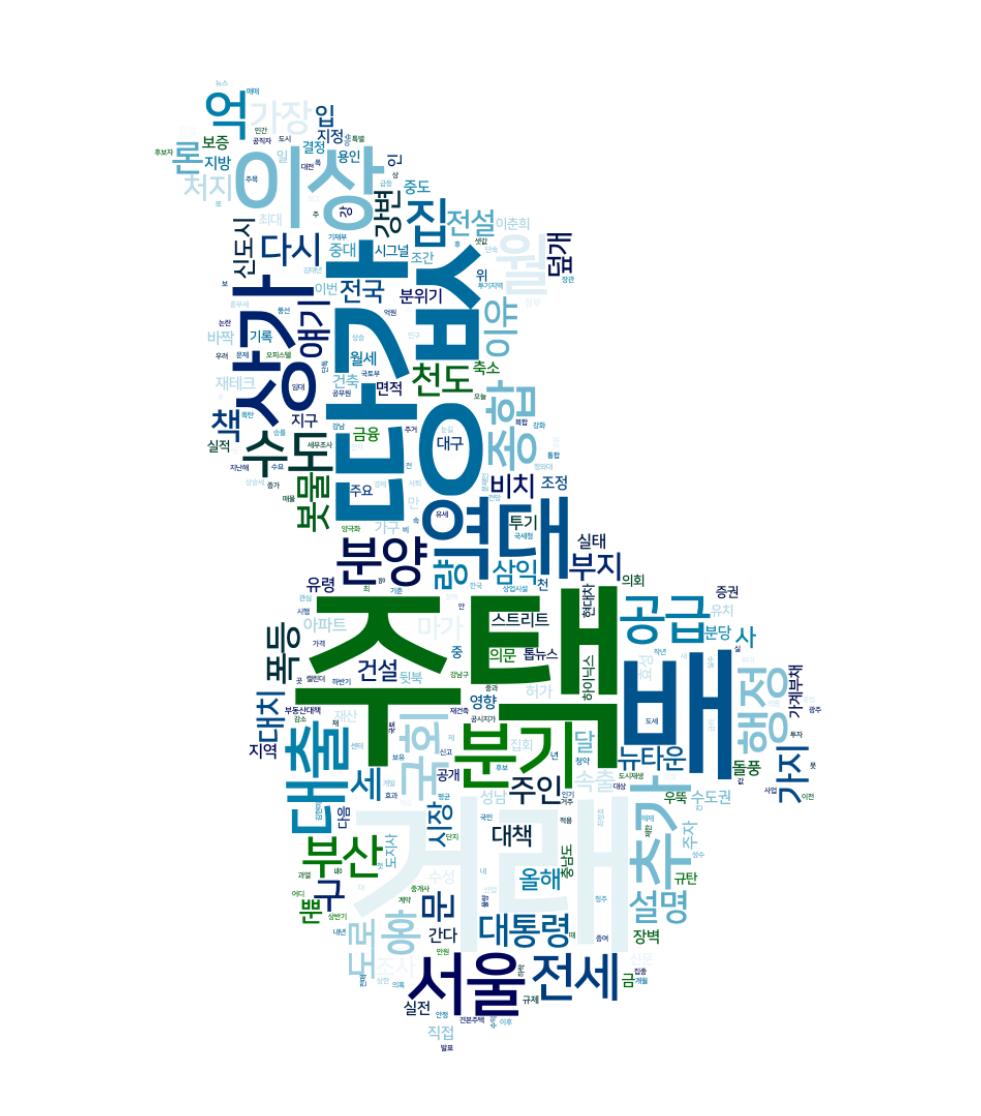

In [61]:
#세종시 지도 모양으로 자르기
pic = np.array(Image.open('sejong.png'))
wordcloud = WordCloud(font_path = 'NanumSquareOTFBold.otf', max_words=300, stopwords = '주택',
                        width=2000,height=2500,background_color ='white',colormap = 'ocean',mask = pic)

# 워드 클라우드 그리기
wordcloud = wordcloud.generate_from_frequencies(tokenizing(df))
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

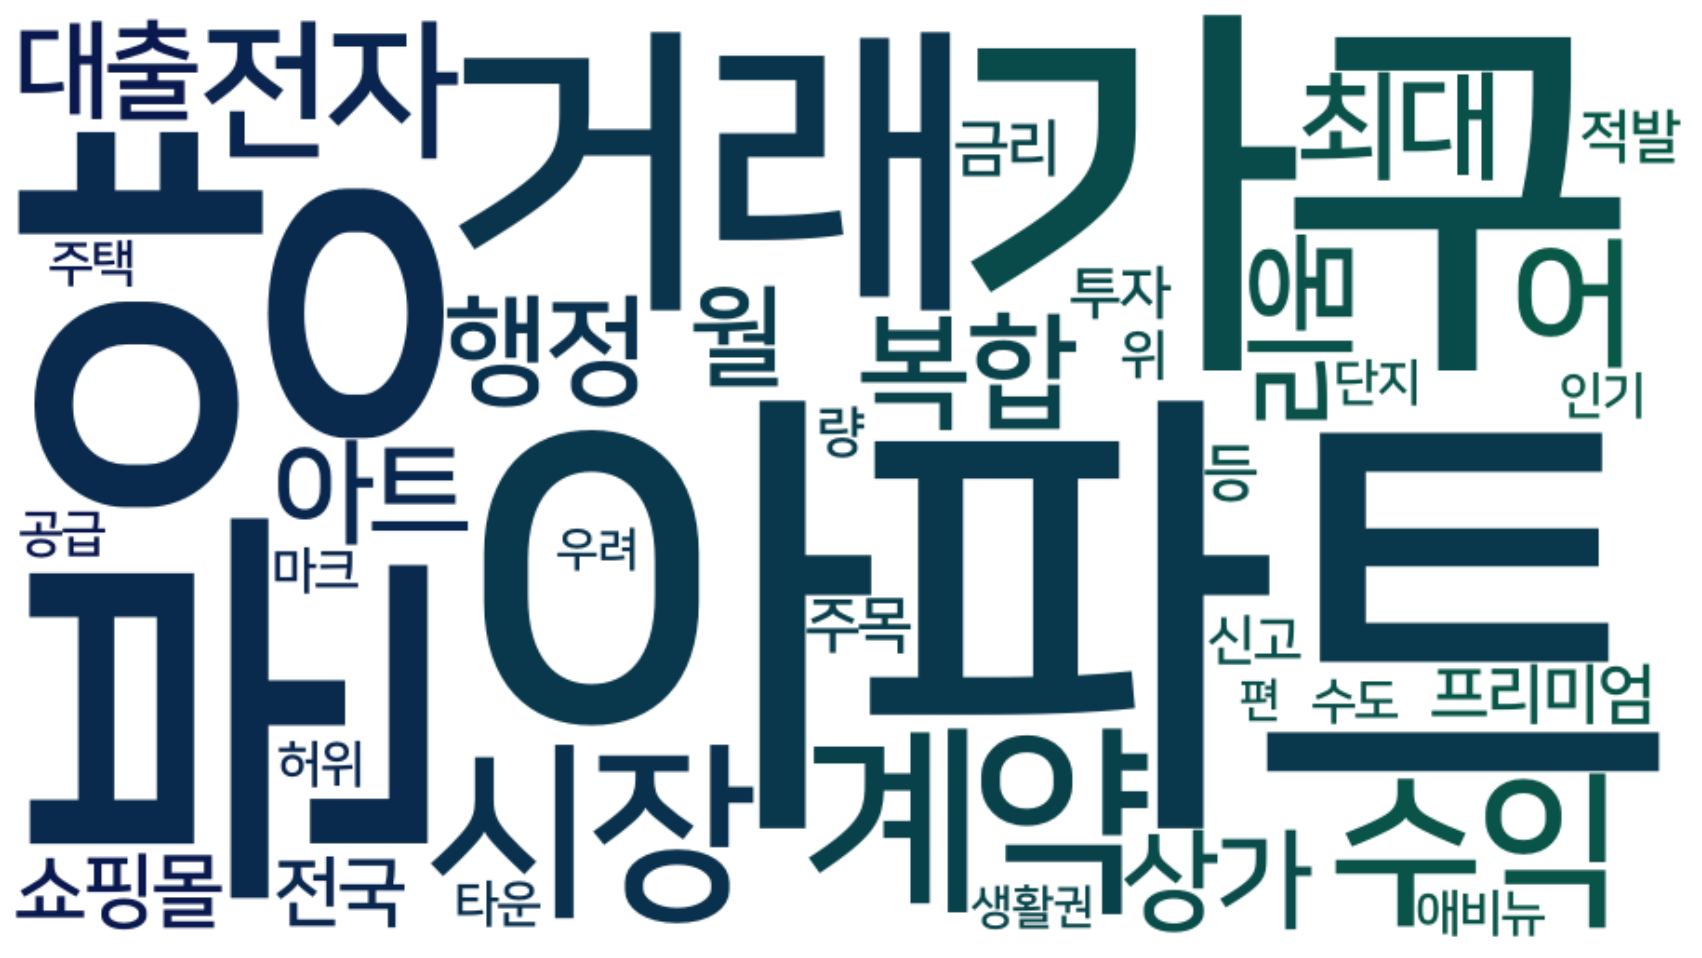

In [62]:
# 2017년 1월 1일 ~ 3월 31일
wcdraw(df1,900,500,'1-1.png')

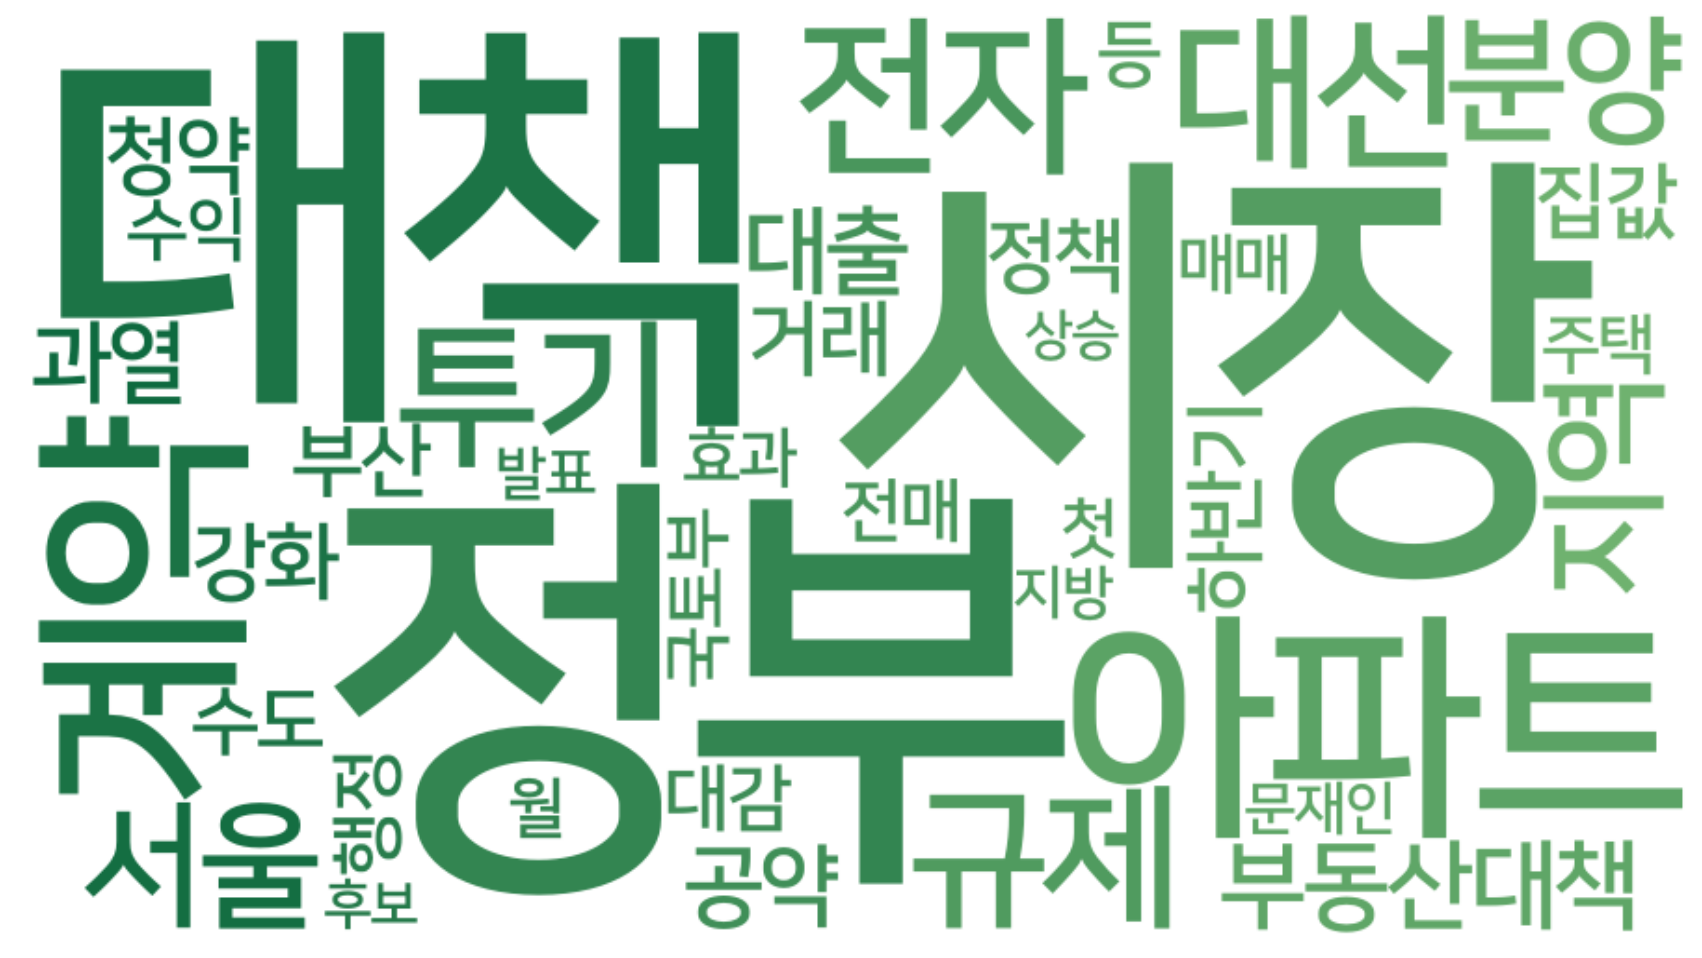

In [63]:
# 2017년 4월 1일 ~ 7월 31일
wcdraw(df2,900,500,'1-2.png')

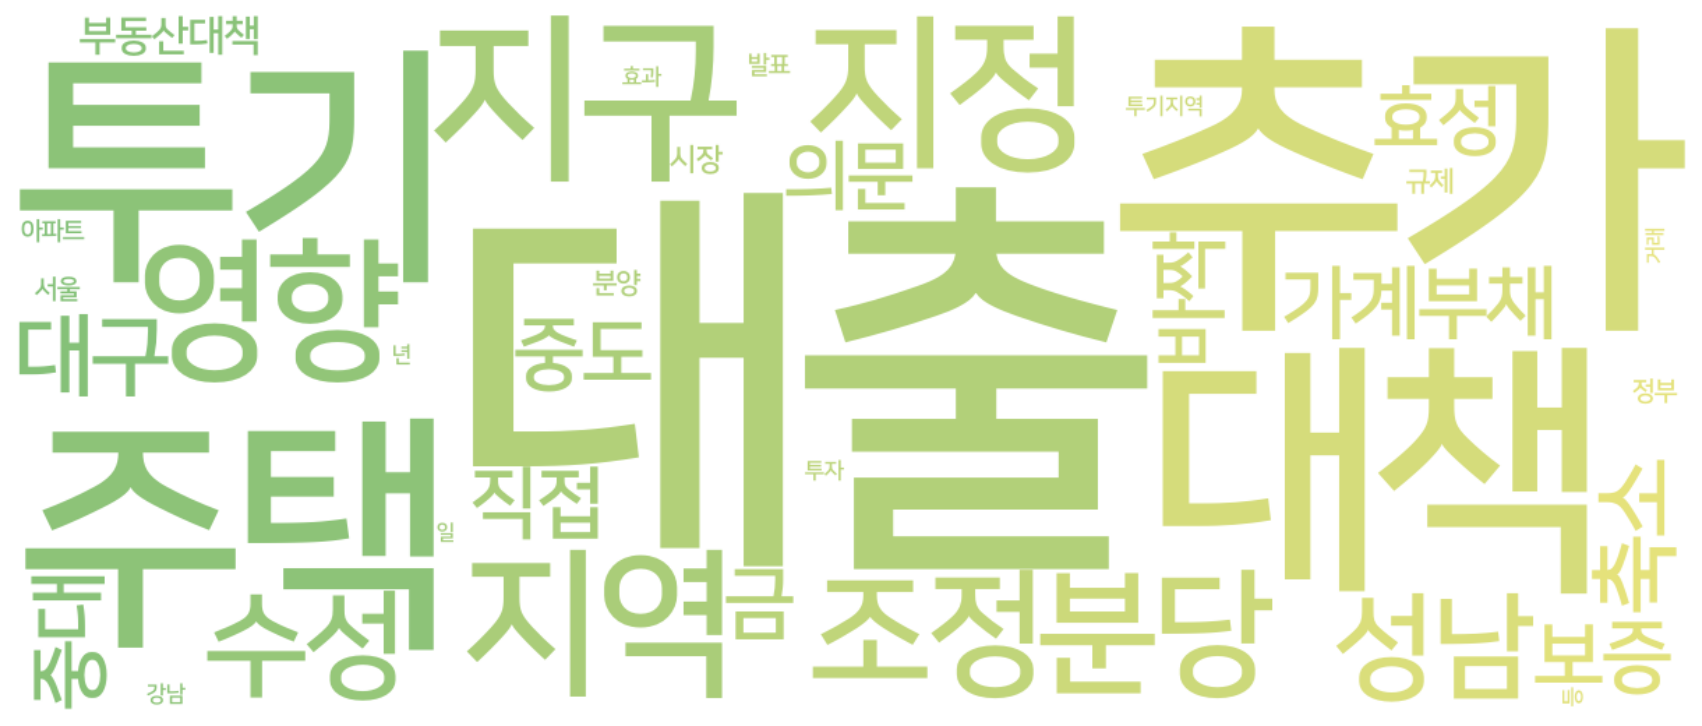

In [64]:
# 2017년 7월 1일 ~ 10월 31일
wcdraw(df3, 1200,500, '1-3.png')

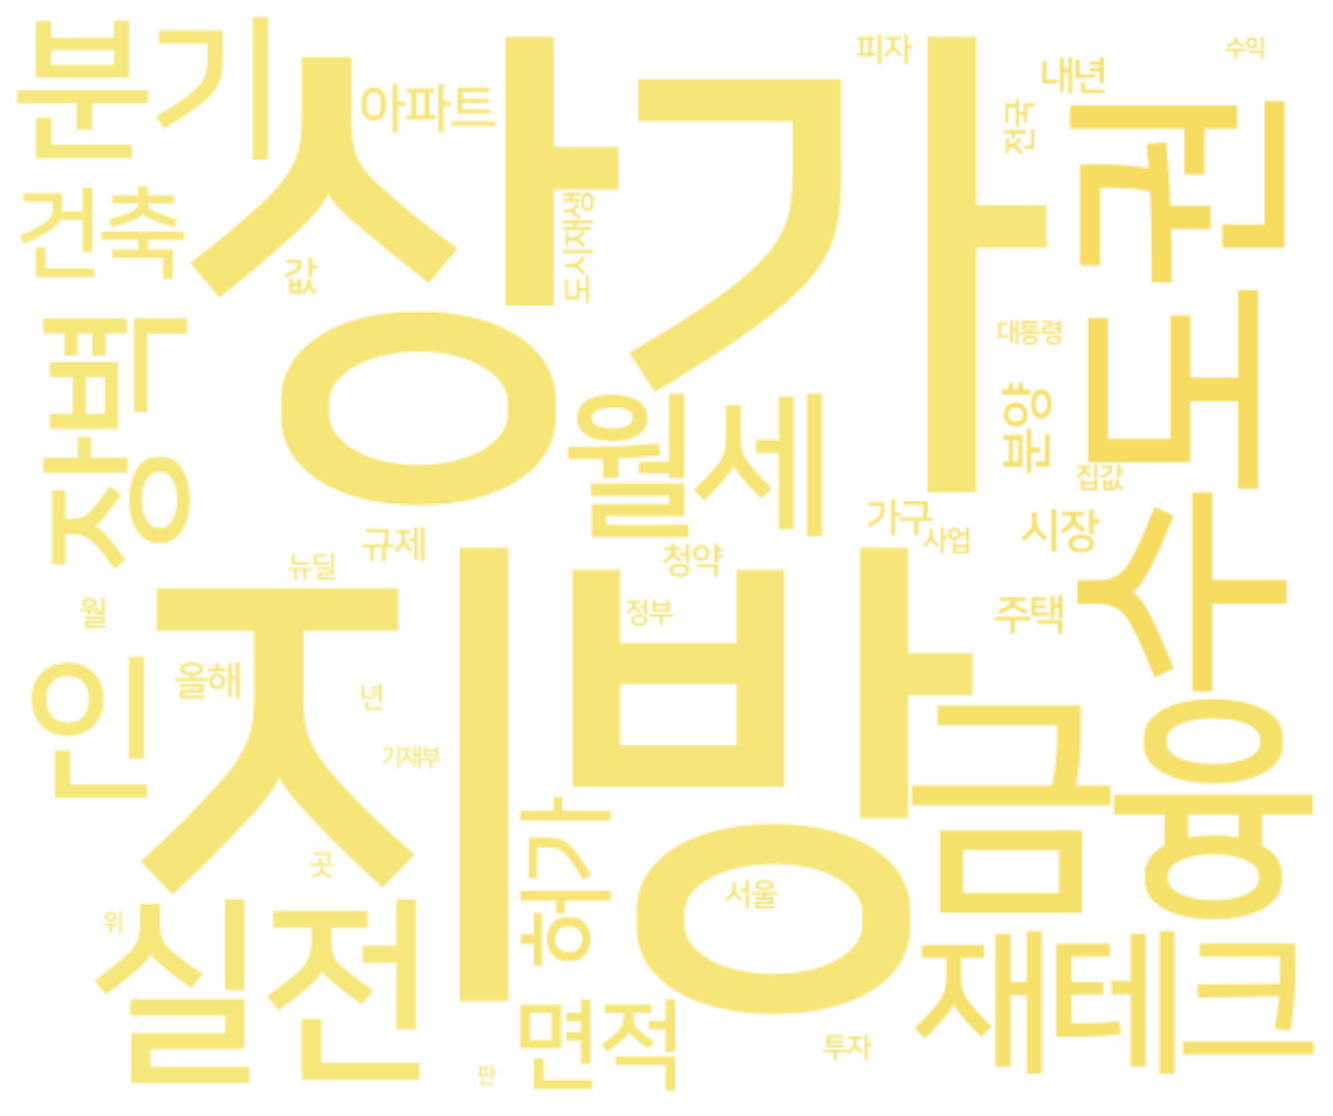

In [65]:
#2017년 11월 ~ 2017년 12월 31일
wcdraw(df4,600,500,'1-4.png')

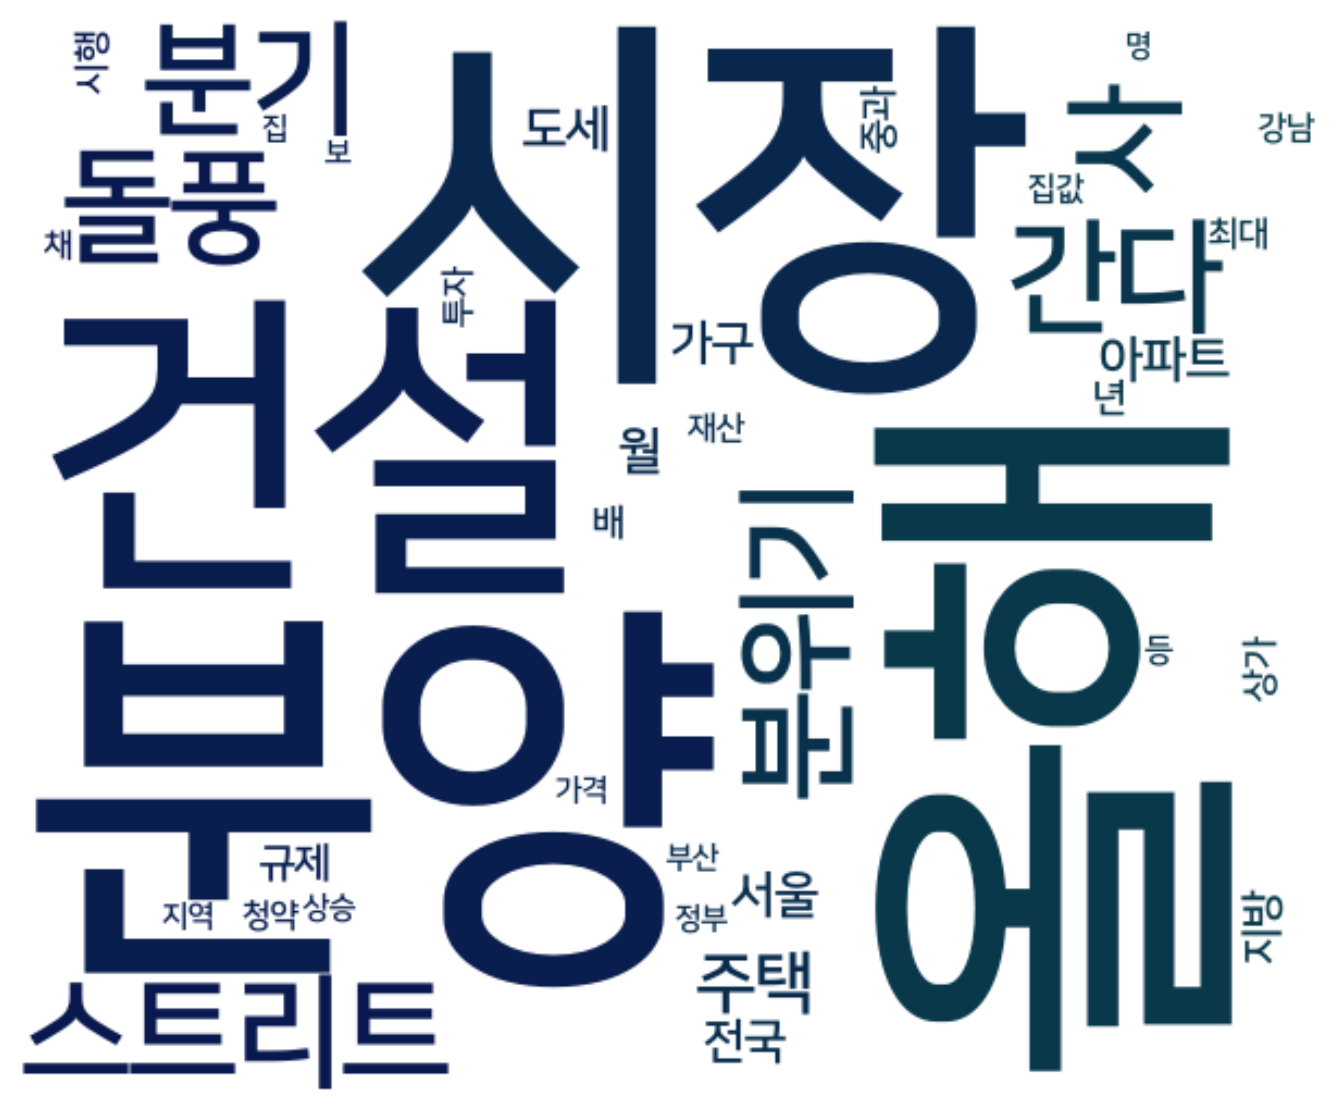

In [66]:
#2018년 1월 ~ 4월 30일
wcdraw(df5, 600, 500, '2-1.png')

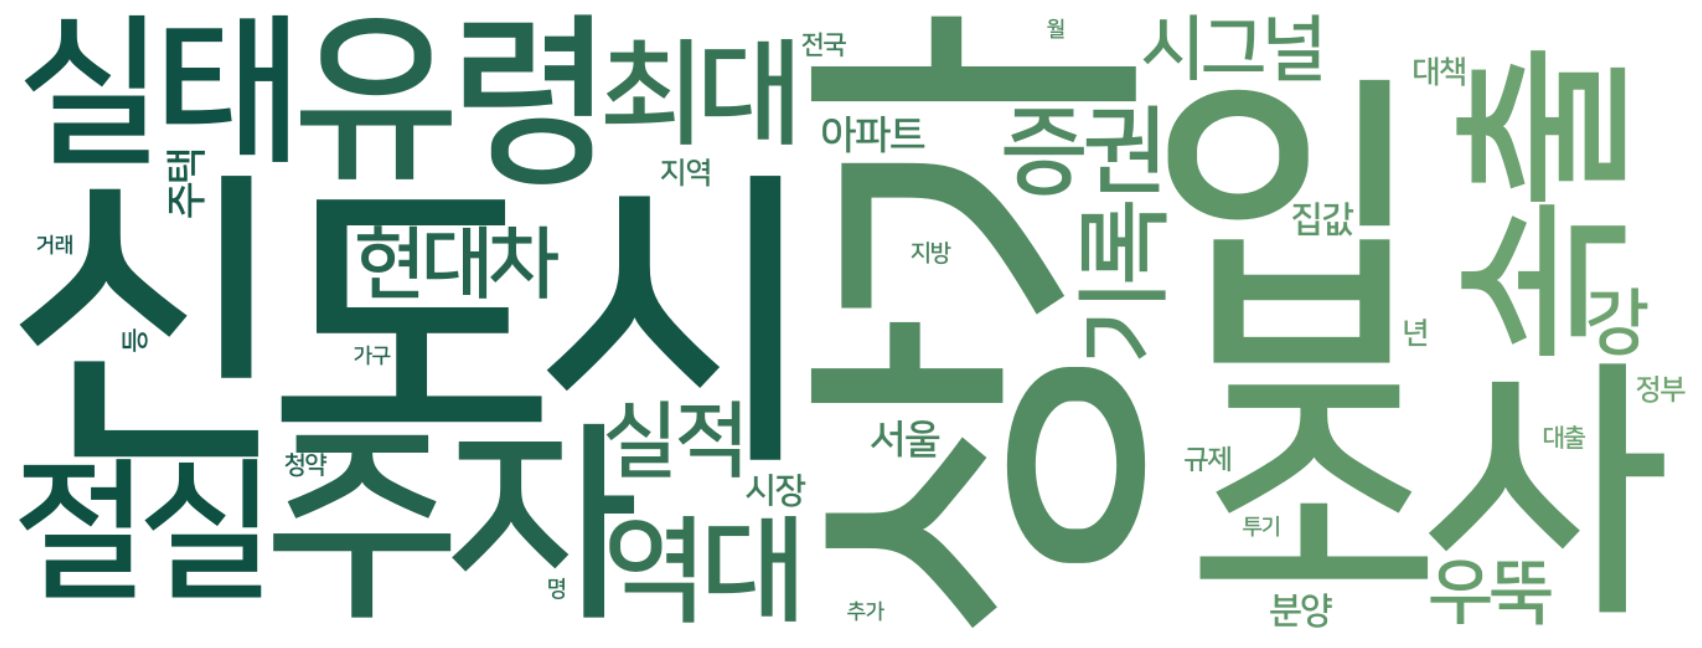

In [67]:
# 2018년 5월 ~ 2019년 1월 
wcdraw(df6, 1350,500,'2-2.png')

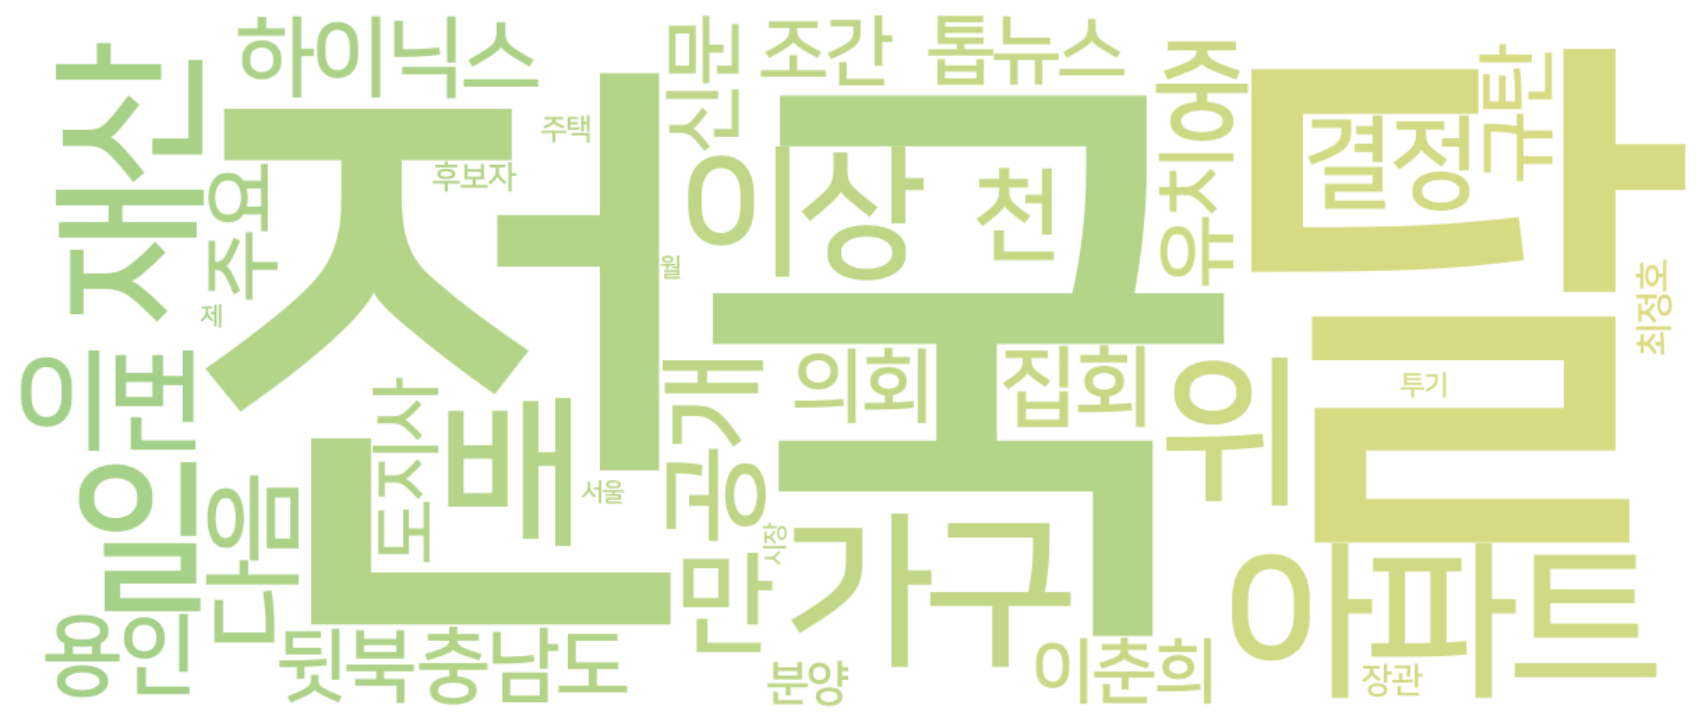

In [68]:
#2019년 2월 ~ 2019년 9월
wcdraw(df7, 1200, 500, '2-3.png')

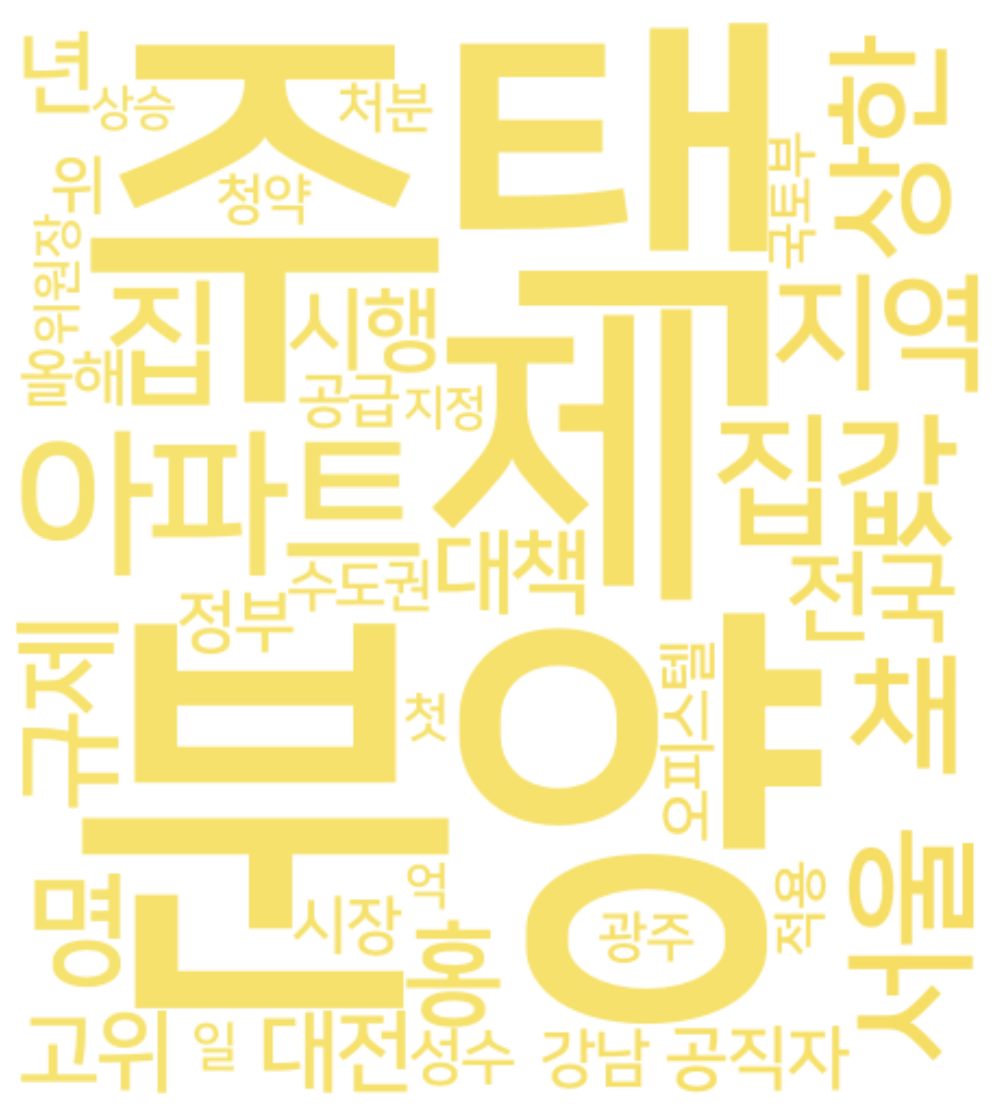

In [69]:
#2019년 10월 ~ 12월 31일
wcdraw(df8, 450, 500, '2-4.png')

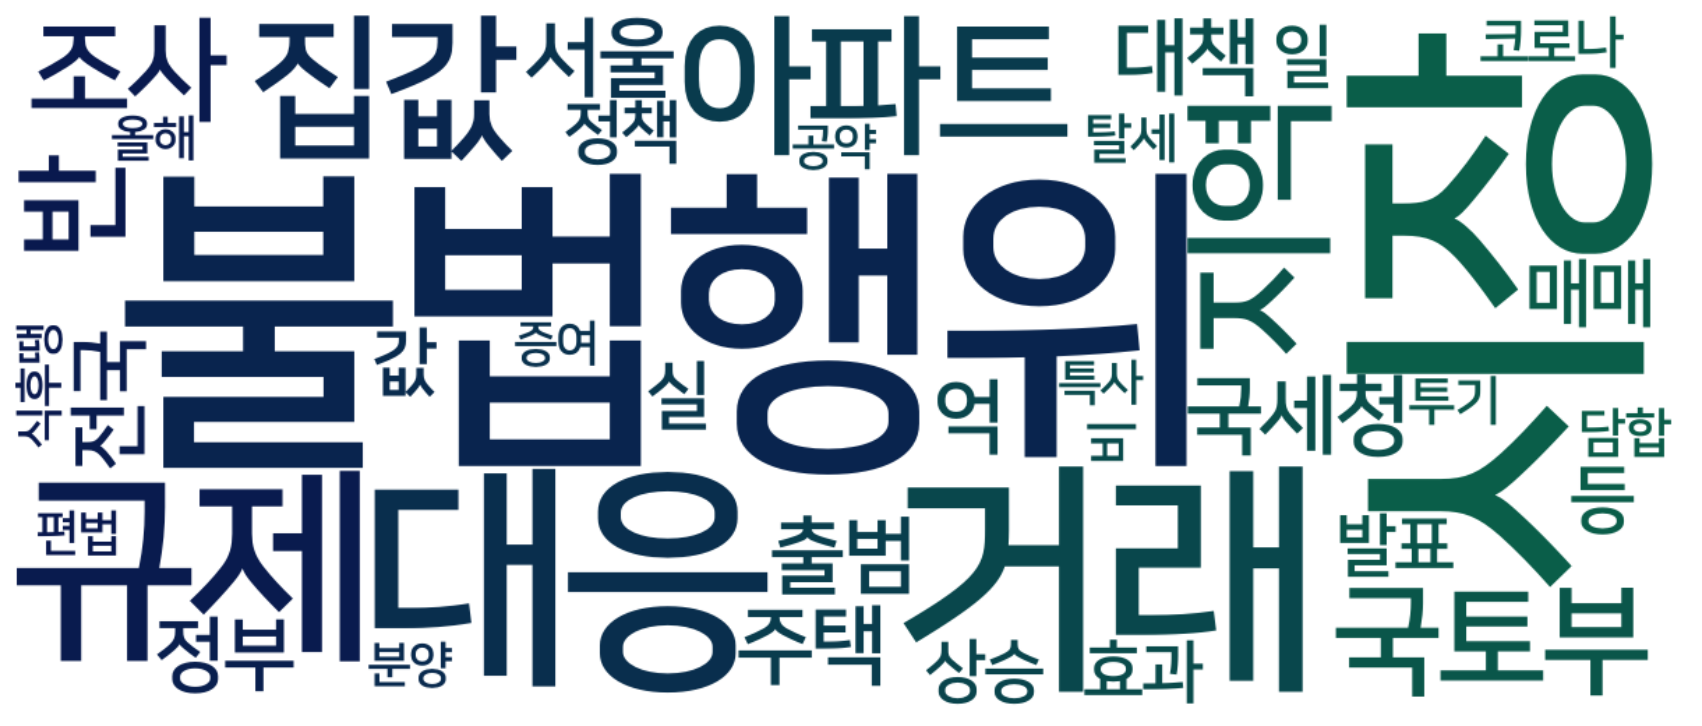

In [70]:
# 2020년 1월 ~ 4월
wcdraw(df9, 1200, 500, '3-1.png')

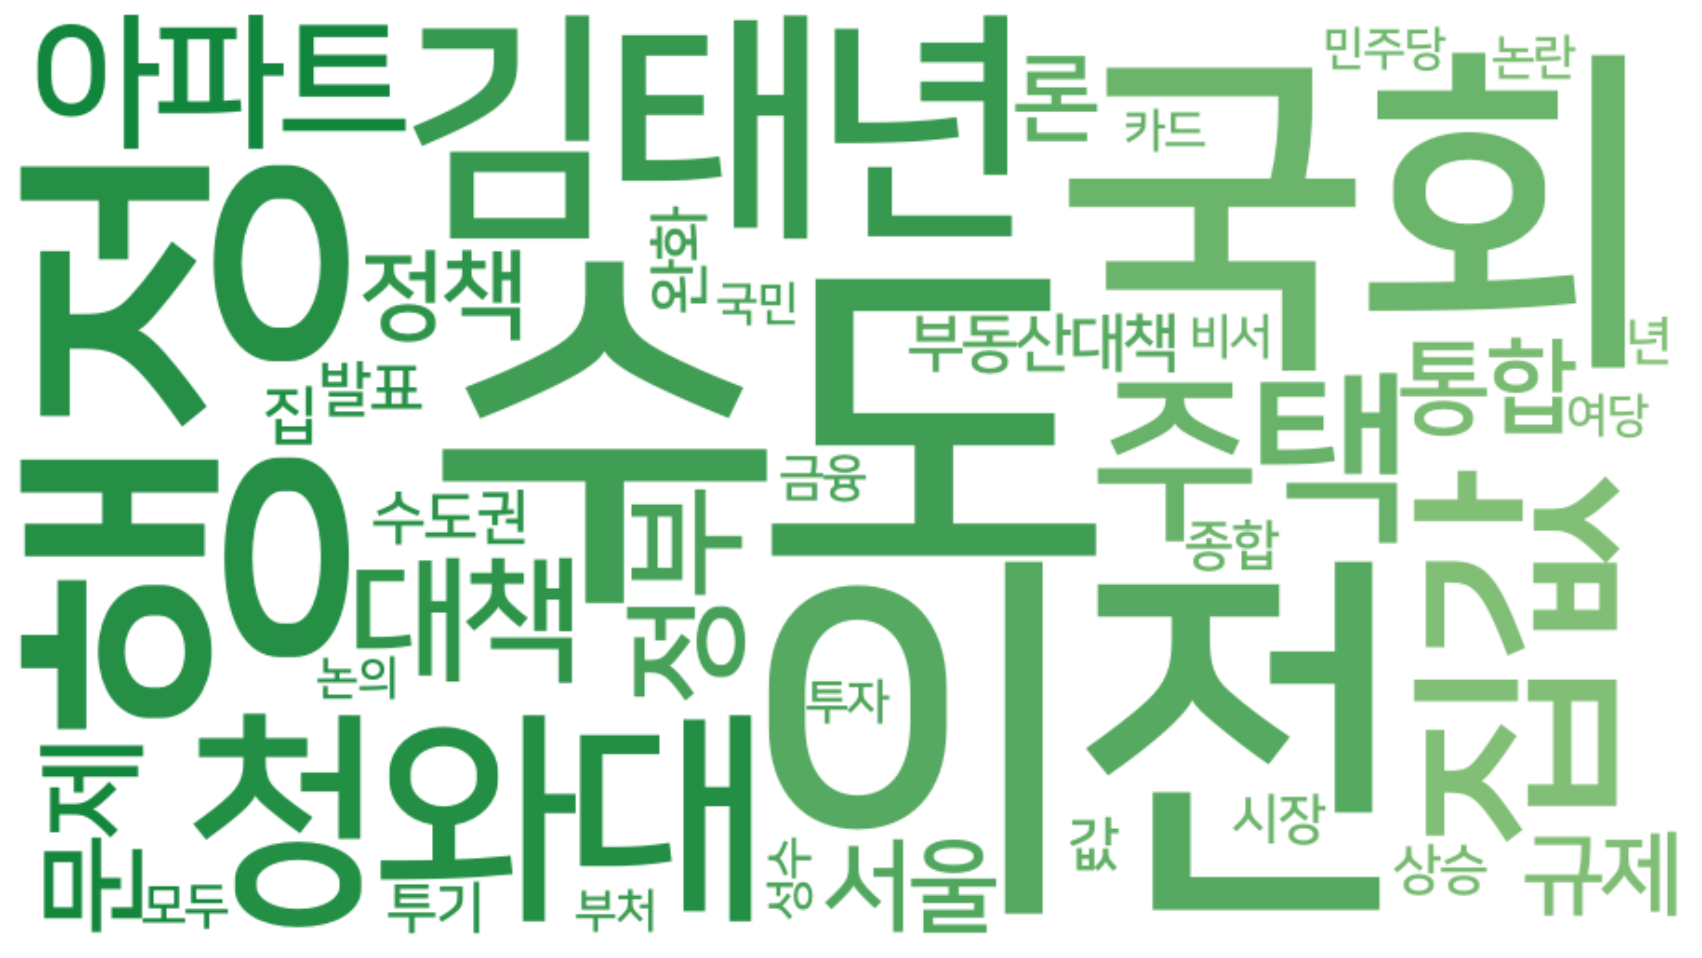

In [71]:
# 2020년 5월 ~ 7월 31일
wcdraw(df10, 900, 500, '3-2.png')

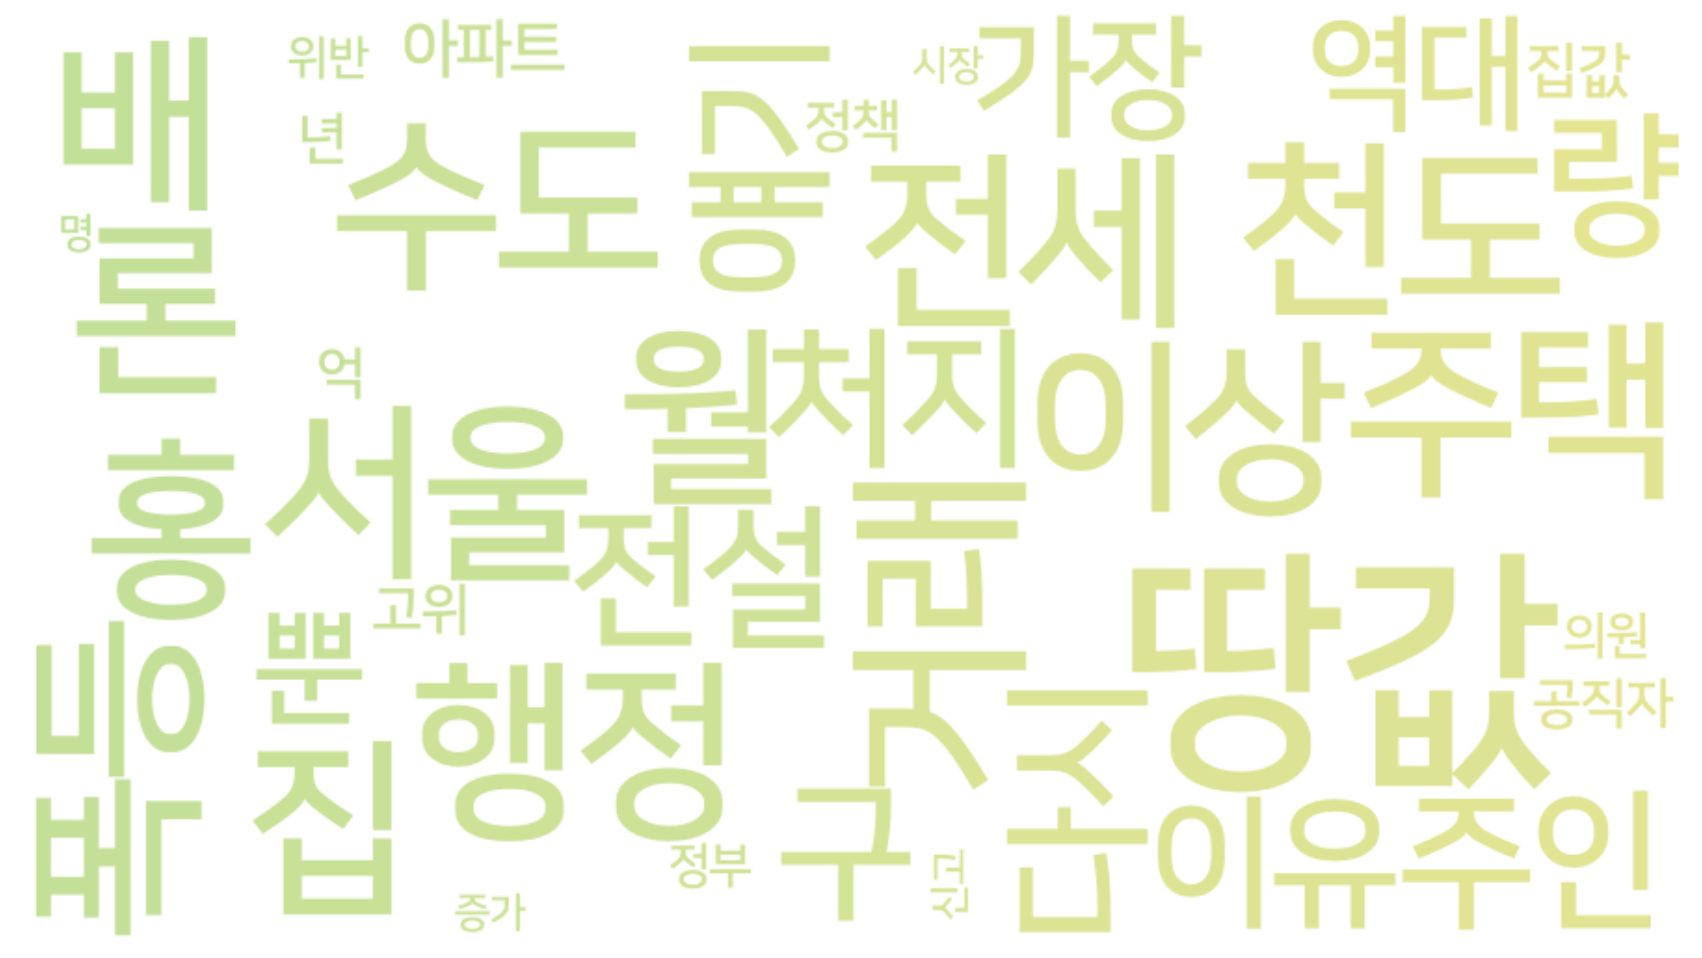

In [72]:
# 2020년 8월 ~ 10월 31일
wcdraw(df11, 900, 500, '3-3.png')

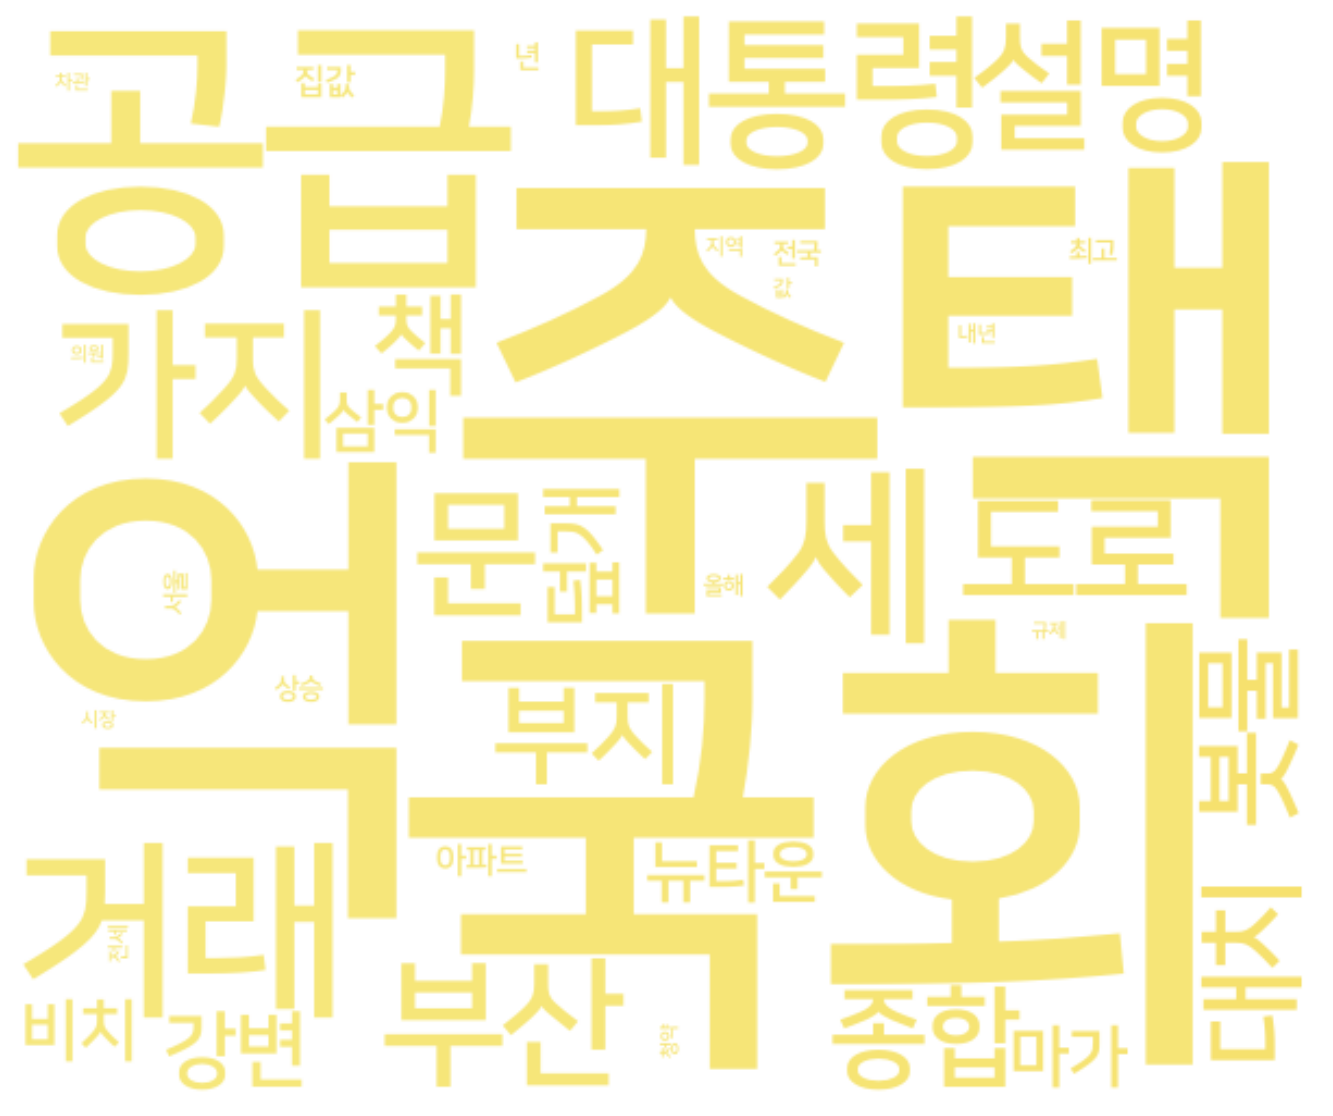

In [73]:
# 2020년 11월 1일 ~ 12월 31일
wcdraw(df12, 600, 500, '3-4.png')

In [ ]:
- - -
# 2. Visualization

## 0) 함수정의

- plot_grid_map 함수: QGIS를 활용하여 만든 500X500격자와 주어진 데이터를 id(그리드)별로 통합하여 FisherJenks 이론을 바탕으로 세종특별자치시 지도 위에 단계(k)별로 그리는 함수


import mapclassify as mc
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.colors import ListedColormap
import matplotlib
%config InlineBackend.figure_format='retina' #화질 좋게 해주기

import matplotlib.font_manager as fm
nanumr = fm.FontProperties(fname='NanumSquareOTFRegular.otf', size=18)
nanumb = fm.FontProperties(fname='NanumSquareOTFBold.otf', size=18)

def plot_grid_map(df, col, k = 6, title = 'No name', mode = None, cls_dict = None, how = None,
                  annotation = False, percen = True, colors = 'Blues', c_mode = 'NaturalBreaks'):
    
    # 주어진 데이터를 적절히 단계별로 나누는 코드
    if mode == 'cont_classify':
        dfdf = df[df[col]>0]
        if c_mode == 'NaturalBreaks':
            quantiles = mc.NaturalBreaks(dfdf[col].dropna(), k = k)
        elif c_mode == 'FisherJenks':
            quantiles = mc.FisherJenks(dfdf[col].dropna(), k = k)
        df['cls_value'] = quantiles.find_bin(df[col]).astype('str')
        df.loc[df[col].isnull(), 'cls_value'] = 'No Data'
        df.loc[df[col]<0, 'cls_value'] = 'Minus'
        cmap = plt.cm.get_cmap(colors, k)
        cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
        if len(np.where(df['cls_value'].unique() == 'Minus')[0]) != 0:
            cmap_list.append('#F78181')
        if len(np.where(df['cls_value'].unique() == 'No Data')[0]) != 0:
            cmap_list.append('#bdbdbd')
        cmap_with_grey = ListedColormap(cmap_list)
    if mode == 'cluster':
        k = len(df[col].unique())
        df[col].fillna(-2, inplace=True)
        df[col].astype('int')
        df['cls_value'] = df[col] + 1
        df.sort_values('cls_value')
        df.loc[df[col]<0, 'cls_value'] = 'No Data'
        cmap = plt.cm.get_cmap(colors, k)
        cmap_list = [rgb2hex(cmap(i)) for i in range(cmap.N)]
        if len(np.where(df['cls_value'].unique() == 'No Data')[0]) != 0:
            cmap_list.append('#bdbdbd')
        cmap_with_grey = ListedColormap(cmap_list)
    
        
    # plot 그리는 코드
    fig, ax = plt.subplots(figsize=(12, 10))
    df.plot(column='cls_value', edgecolor='k', cmap=cmap_with_grey,linewidth=0.05,
             legend=True, legend_kwds=dict(loc='upper right'),ax=ax)
    
    # 범례이름 바꾸는 코드
    if mode == 'cont_classify':
        legend_labels = ax.get_legend().get_texts()
        upper_bounds = quantiles.bins
        bounds = []
        for index, upper_bound in enumerate(upper_bounds):
            if index == 0:
                lower_bound = float(df.cls_value.min())
            else:
                lower_bound = float(upper_bounds[index-1])
            
            if percen:
                bound = '{}% - {}%'.format(round(lower_bound, 1), round(upper_bound, 1))
            else:
                bound = '{} - {}'.format(round(lower_bound, 2), round(upper_bound, 2))
            bounds.append(bound)
    if mode == 'cluster':
        if 'No Data' in list(df['cls_value'].unique()):
            legend_labels = ax.get_legend().get_texts()
            bounds = []
            for num in list(price_merge['cls_value'].unique())[0:-1]:
                bound = 'cluster {}'.format(round(num))
                bounds.append(bound)     
        else:
            legend_labels = ax.get_legend().get_texts()
            bounds = []
            for num in list(price_merge['cls_value'].unique()):
                bound = 'cluster {}'.format(num)
                bounds.append(bound)  
        
    # replace the numerical legend labels
    for bound, legend_label in zip(bounds, legend_labels):
        legend_label.set_text(bound)
        
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'} , fontproperties=nanumr)
    fig.show()

- 색깔 팔레트: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## 1) 시기별 이슈 확인

### 시계열로 거래 데이터 시각화

# datetime 형태로 바꿔줍니다

df3, df4, df5, df6  = data3, data4, data5, data6
df7, df8, df9, df10  = data7, data8, data9, data10

df3['계약년월'] = pd.to_datetime(df3['계약년월'], format='%Y%m')
df4['계약년월'] = pd.to_datetime(df4['계약년월'], format='%Y%m')
df5['계약년월'] = pd.to_datetime(df5['계약년월'], format='%Y%m')
df6['계약년월'] = pd.to_datetime(df6['계약년월'], format='%Y%m')
df7['계약년월'] = pd.to_datetime(df7['계약년월'], format='%Y%m')
df8['계약년월'] = pd.to_datetime(df8['계약년월'], format='%Y%m')
df9['계약년월'] = pd.to_datetime(df9['계약년월'], format='%Y%m')
df10['계약년월'] = pd.to_datetime(df10['계약년월'], format='%Y%m')

# 전월세 데이터를 전세와 월세로 구분합니다
# 1이 전세, 2가 월세

df71 = df7[df7['전월세구분'] == '전세']
df72 = df7[df7['전월세구분'] == '월세']
df81 = df8[df8['전월세구분'] == '전세']
df82 = df8[df8['전월세구분'] == '월세']
df91 = df9[df9['전월세구분'] == '전세']
df92 = df9[df9['전월세구분'] == '월세']
df101 = df7[df7['전월세구분'] == '전세']
df102 = df7[df7['전월세구분'] == '월세']

# 월별로 계약 건수를 세주는 함수를 만듭니다

def counting(df):
    df = df.set_index('계약년월')
    df = df.groupby([pd.Grouper(freq='1M')]).count()
    return df

# 하나의 데이터프레임으로 합쳐줍니다

df = DataFrame()
df['apt_m'] = counting(df3)['계약일']
df['vil_m'] = counting(df4)['계약일']
df['house_m'] = counting(df5)['계약일']
df['op_m'] = counting(df6)['계약일']
df['apt_j'] = counting(df71)['계약일']
df['vil_j'] = counting(df81)['계약일']
df['house_j'] = counting(df91)['계약일']
df['op_j'] = counting(df101)['계약일']
df['apt_w'] = counting(df72)['계약일']
df['vil_w'] = counting(df82)['계약일']
df['house_w'] = counting(df92)['계약일']
df['op_w'] = counting(df102)['계약일']

df = df.reset_index()

df['apt'] = df['apt_m'] + df['apt_j'] + df['apt_w']
df['vil'] = df['vil_m'] + df['vil_j'] + df['vil_w']
df['house'] = df['house_m'] + df['house_j'] + df['house_w']
df['op'] = df['op_m'] + df['op_j'] + df['op_w']
df['buy'] = df['apt_m'] + df['vil_m'] + df['house_m'] + df['op_m']
df['jun'] = df['apt_j'] + df['vil_j'] + df['house_j'] + df['op_j']
df['wol'] = df['apt_w'] + df['vil_w'] + df['house_w'] + df['op_w']
df['all'] = df['apt'] + df['vil'] + df['house'] + df['op']
deal = df

### 세종시 실거래량 추이

from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['all'], line = dict(color='#0B0B61', width=3)))
fig.update_layout(title='세종시 실거래량 추이', plot_bgcolor='#F8F7F1')
fig.show()

### 세종시 거주형태별 실거래량 추이

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['apt'], line = dict(color='#0B0B61', width=3), name='아파트'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['vil'], line = dict(color='#404040', width=3), name='연립다세대'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['house'], line = dict(color='#F3C706', width=3), name='단독다가구'))
fig.add_trace(go.Scatter(x=deal['계약년월'],y=deal['op'], line = dict(color='#0B6121', width=3), name='오피스텔'))
fig.update_layout(title='세종시 거주형태별 거래량 추이', plot_bgcolor='#F8F7F1')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()


### 세종시 거래형태별 실거래량 추이

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['buy'], line = dict(color='#0B0B61', width=3), name='매매'))
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['jun'], line = dict(color='#0B6121', width=3), name='전세'))
fig.add_trace(go.Scatter(x=df['계약년월'],y=df['wol'], line = dict(color='#F3C706', width=3), name='월세'))
fig.update_layout(title='세종시 거래형태별 거래량 추이', plot_bgcolor='#F8F7F1')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

네이버 뉴스 크롤링 자료 활용 (2017년 1월 ~ 2020년 12월까지, '세종시 부동산' 이라는 키워드로 뉴스 기사 크롤링

df2017 = pd.read_csv('sejong2017.csv', encoding= 'utf-8')
df2018 = pd.read_csv('sejong2018.csv', encoding= 'utf-8')
df2019 = pd.read_csv('sejong2019.csv', encoding= 'utf-8')
df2020 = pd.read_csv('sejong2020.csv', encoding= 'utf-8')

# Data concat
df = pd.concat([df2017,df2018,df2019,df2020])

# 데이터 길이 확인
print('2017년: ',len(df2017))
print('2018년: ',len(df2018))
print('2019년: ',len(df2019))
print('2020년: ',len(df2020))

### Tokenizing package

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

### 데이터 전처리

# 불용어 설정
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수','세종시','세종','부동산']

# 훈련 데이터 한글과 공백을 제외하고 모두 제거
df['title'] = df['title'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['title'].replace('', np.nan, inplace=True)

### 뉴스 개수 변화 추이

df['years'] = pd.to_datetime(df['years'], format='%Y.%m.%d.')

def counting(df):
    df = df.set_index('years')
    df = df.groupby([pd.Grouper(freq='1M')]).count()
    return df

df2 = counting(df)

df2 = df2.drop(['contents','link','Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis = 1)

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=df2.index,y=df2['title'], line = dict(color='#0B0B61', width=3)))
fig.update_layout(title='연월별 뉴스 보도 개수 추이', plot_bgcolor='#F8F7F1')
fig.show()

### 기사 제목 토큰화

okt = Okt()
token = []
for sentence in df['title']:
    temp_X = []
    temp_X = okt.nouns(sentence) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
df['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

### 기준에 따른 분류 - 12개 구간으로 설정

df = df.sort_values('years')

import datetime
df_1 = df[df['years'] <'2017-04-01'] # 3 / 1,2,3
df_2 = df[(df['years']>= '2017-04-01')&(df['years'] <'2017-07-01')] # 3 / 4,5,6
df_3 = df[(df['years']>= '2017-07-01')&(df['years'] <'2017-11-01')] # 4 / 7,8,9,10
df_4 = df[(df['years']>= '2017-11-01')&(df['years'] <'2018-01-01')] # 2 / 11,12
df_5 = df[(df['years']>= '2018-01-01')&(df['years'] <'2018-05-01')] # 4 / 1,2,3,4
df_6 = df[(df['years']>= '2018-05-01')&(df['years'] <'2019-02-01')] # 9
df_7 = df[(df['years']>= '2019-02-01')&(df['years'] <'2019-10-01')] # 8
df_8 = df[(df['years']>= '2019-10-01')&(df['years'] <'2020-01-01')] # 3
df_9 = df[(df['years']>= '2020-01-01')&(df['years'] <'2020-05-01')] # 4
df_10 = df[(df['years']>= '2020-05-01')&(df['years'] <'2020-08-01')] # 3
df_11 = df[(df['years']>= '2020-08-01')&(df['years'] <'2020-11-01')] # 3
df_12 = df[df['years']>= '2020-11-01'] # 2

from collections import Counter # 단어 빈도 수 세기
def tokenizing(df):
    #konlpy로 명사만 추출하는 토큰화를 진행
    words = np.hstack(df['token'].values)
    word_count = Counter(words)
    #print(word_count.most_common(20))
    input = dict(word_count.most_common(300))
    return input

df1 = tokenizing(df_1)
df2 = tokenizing(df_2)
df3 = tokenizing(df_3)
df4 = tokenizing(df_4)
df5 = tokenizing(df_5)
df6 = tokenizing(df_6)
df7 = tokenizing(df_7)
df8 = tokenizing(df_8)
df9 = tokenizing(df_9)
df10 = tokenizing(df_10)
df11 = tokenizing(df_11)
df12= tokenizing(df_12)

### 워드 클라우드 그리기

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# 워드클라우드를 그리는 함수 만들기
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

def wcdraw(inputs,width,height,path):
    pic = np.array(Image.open(path))
    image_colors = ImageColorGenerator(pic)
    # 네모 모양으로 wordcloud 생성하기
    wordcloud = WordCloud(font_path = 'NanumSquareOTFBold.otf', max_words=40,
                          width=width,height=height,background_color ='white',)

    # 워드 클라우드 그리기
    wordcloud = wordcloud.generate_from_frequencies(inputs)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")

#세종시 지도 모양으로 자르기
pic = np.array(Image.open('sejong.png'))
wordcloud = WordCloud(font_path = 'NanumSquareOTFBold.otf', max_words=300, stopwords = '주택',
                        width=2000,height=2500,background_color ='white',colormap = 'ocean',mask = pic)

# 워드 클라우드 그리기
wordcloud = wordcloud.generate_from_frequencies(tokenizing(df))
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2017년 1월 1일 ~ 3월 31일
wcdraw(df1,900,500,'1-1.png')

# 2017년 4월 1일 ~ 7월 31일
wcdraw(df2,900,500,'1-2.png')

# 2017년 7월 1일 ~ 10월 31일
wcdraw(df3, 1200,500, '1-3.png')

#2017년 11월 ~ 2017년 12월 31일
wcdraw(df4,600,500,'1-4.png')

#2018년 1월 ~ 4월 30일
wcdraw(df5, 600, 500, '2-1.png')

# 2018년 5월 ~ 2019년 1월 
wcdraw(df6, 1350,500,'2-2.png')

#2019년 2월 ~ 2019년 9월
wcdraw(df7, 1200, 500, '2-3.png')

#2019년 10월 ~ 12월 31일
wcdraw(df8, 450, 500, '2-4.png')

# 2020년 1월 ~ 4월
wcdraw(df9, 1200, 500, '3-1.png')

# 2020년 5월 ~ 7월 31일
wcdraw(df10, 900, 500, '3-2.png')

# 2020년 8월 ~ 10월 31일
wcdraw(df11, 900, 500, '3-3.png')

# 2020년 11월 1일 ~ 12월 31일
wcdraw(df12, 600, 500, '3-4.png')